/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(400.0, 1600.0)

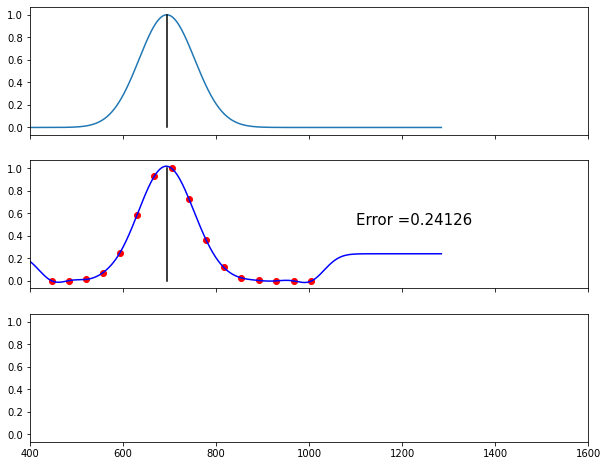

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from matplotlib import pyplot as plt

fig , ax = plt.subplots(3,1,sharex=True,sharey=True,figsize=(10,8))

N = 16
parameter = np.log2(N)


mp = 1.67 * 10 ** (-27) # kg
n = 24.7222 # #/cm^3
T_par = 306124 # K
T_perp = 843684 
k = 1.38 * 10 ** (-23) # J/K
v_th_par = 71.0896
v_th_perp = 118.018
v_x = 692.564 # Km/s
v_y = 55.7665
v_z = 3.2093
v_bu = np.sqrt(v_x ** 2 + v_y ** 2 + v_z ** 2)
v_bu_par = 579.343
v_bu_perp1 = 383.256
v_bu_perp2 = 15.549
v_th = np.sqrt(v_th_par ** 2 + v_th_perp ** 2)

data = open("data.txt",'r').readlines()

data_dv = data[1].split("   ")
del data_dv[0]
data_dv = list(map(float,data_dv))
data_dv = np.array(data_dv)

data_v = data[3].split("   ")
del data_v[0]
data_v = np.array(list(map(float,data_v)))

def maxwellian(v):
  cof = (n * 10 ** (-15)) / (np.sqrt(np.pi)*v_th)**3
  function = cof * np.power(np.e,-((v - v_bu) ** 2 / v_th ** 2))
  return function

def bi_maxwellian(par,perp1,perp2):
  cof = n * 10 ** (-15) / (v_th_par * (v_th_perp**2) * np.sqrt(np.pi**3))
  function = cof * np.power(np.e,-((par - v_bu_par)  **2 / v_th_par **2)) * np.power(np.e,-((perp1 - v_bu_perp1) **2 / v_th_perp **2))* np.power(np.e,-((perp2 - v_bu_perp2) **2 / v_th_perp **2))
  return function

v_par = np.linspace(200,1000,10**4)
v_perp1 = np.linspace(0,800,10**4)
v_perp2 = np.linspace(0,100,10**4)
v = np.sqrt(v_par**2 + v_perp1**2 + v_perp2 **2)

v_par_1 = np.linspace(400,800,N)
v_perp_1 = np.linspace(200,600,N)
v_perp_2 = np.linspace(0,100,N)
v_1 = np.sqrt(v_par_1**2 + v_perp_1**2 + v_perp_2**2)

dv = bi_maxwellian(v_par,v_perp1,v_perp2)
dv = dv / max(dv)
dv_1 = bi_maxwellian(v_par_1,v_perp_1,v_perp_2)
dv_1 = dv_1 / max(dv_1)

svm_reg = SVR(kernel='rbf',C=10,epsilon=10**-(parameter+2),gamma = 5*10**-4) # 계수값 변경
svm_reg.fit(np.array(v_1).reshape(-1,1),np.array(dv_1).reshape(-1,1))

pp = svm_reg.predict(np.array(v).reshape(-1,1))

error = max(abs(dv - pp))

ax[0].plot(v,dv)
ax[0].plot([v_bu,v_bu],[0,1],color='black')

ax[1].scatter(v_1,dv_1,color='red')
ax[1].plot(v,pp,color='blue')
ax[1].text(1100,0.5,"Error =" + str(round(error,5)),fontsize=15)
ax[1].plot([v_bu,v_bu],[0,1],color='black')

plt.xlim(400,1600)
#plt.xlim(650,750)
#plt.yscale('log')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


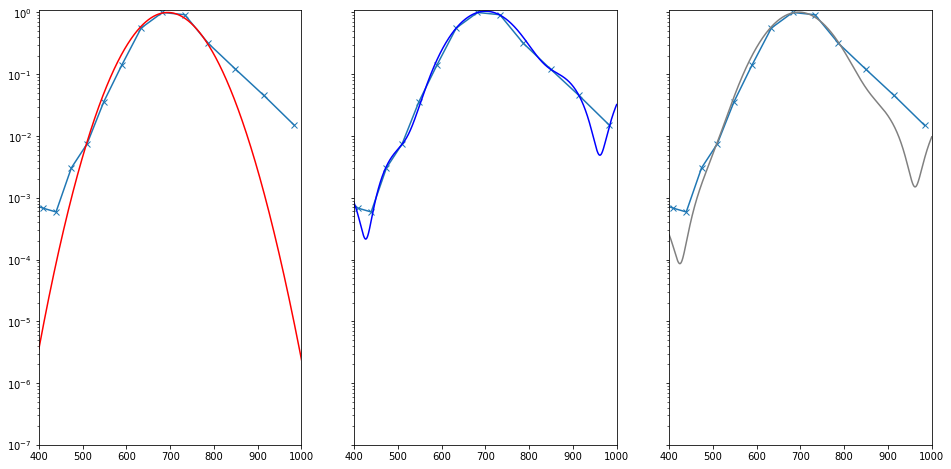

In [ ]:
plt.close()

df = pd.DataFrame({"v" : data_v,"dv" : data_dv})
df = df[df['v'] <= 1000]
df = df[df["dv"] != 0] ; df = df.reset_index()
data_new_v = np.array(df["v"])
data_new_dv = np.array(df["dv"]) / np.max(df["dv"]) 


svm_reg_1 = SVR(kernel='rbf',C=1,epsilon=10**-5,gamma = 10**-4)
svm_reg_1.fit(data_new_v.reshape(-1,1),data_new_dv.reshape(-1,1))

ppp = svm_reg_1.predict(np.array(v).reshape(-1,1))
pppp = svm_reg_1.predict(data_new_v.reshape(-1,1))

error1 = max(abs(dv - ppp))
error2 = max(abs(data_new_dv - pppp))

ppp = ppp

fig1 , ax1 = plt.subplots(1,3,sharex=True,sharey=True,figsize=(16,8))

ax1[0].plot(data_new_v,data_new_dv,marker='x')
ax1[1].plot(data_new_v,data_new_dv,marker='x')
ax1[2].plot(data_new_v,data_new_dv,marker='x')
ax1[1].plot(v,ppp,color='blue')
ax1[0].plot(v,dv,color="red")
ax1[2].plot(v,0.3*ppp+0.7*dv,color='grey')
#ax1.text(800,0.9,"Error =" + str(round(error1,5))+"(vs Bi-Maxwellian)",fontsize=10)
#ax1[0].text(800,0.8,"Error =" + str(round(error2,5))+"(vs Data)",fontsize=10)
#ax1.plot([v_bu,v_bu],[0,1],color='black')
plt.xlim(400,1000)
plt.ylim(0.0000001,1.1)
ax1[0].set_yscale('log')
#ax1[1].set_yscale('linear')

In [ ]:
cal = pd.DataFrame({"v" : v, "ppp" : ppp, "dv" : dv})
cal[cal["v"] < 900]


,v,ppp,dv
0,200.000000,0.003134,1.197850e-17
1,200.080024,0.003125,1.217699e-17
2,200.160081,0.003116,1.237873e-17
3,200.240170,0.003107,1.258377e-17
4,200.320292,0.003099,1.279215e-17
...,...,...,...
6579,899.452362,0.065183,2.864407e-03
6580,899.564528,0.065034,2.846209e-03
6581,899.676694,0.064885,2.828116e-03
6582,899.788861,0.064736,2.810129e-03
